In [1]:
%run ../../common_functions/import_all.py

from scipy import optimize
from scipy.integrate import quad, odeint
from scipy.interpolate import interp1d
from scipy.signal import detrend
from scipy.spatial import distance
from matplotlib.legend_handler import HandlerLine2D

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

dataset = '../../datasets/oldfaithful.txt'

# Some notes on Numpy and Scipy

This is just a very high-level introduction to these two libraries, not meant to be comprehensive at all.

* **Numpy**
    * Array & Matrix manipulation
    * Operations on array/matrix
    * Linear Algebra
    * Polynomials
    * Fitting a polynomial to points
    * Dealing with NaNs
    * The Numpy data format, IO
    
    
* **Scipy**
    * Optimization: finding the minimum of a function
    * Optimization: finding the roots of a function
    * Fitting a functional form, finding its parameters
    * Histograms and PDFs
    * Computing percentiles
    * Interpolate: linear and cubic
    * Integrate: area under the curve
    * Integrate: solve ODEs
    * Remove a linear trend from a noisy signal
    * Mathematical distances

Note: some stuff here comes from the Scipy lectures http://www.scipy-lectures.org/index.html

## Numpy

### Arrays and Matrices: attributes; slicing; reshaping/resizing/flattening

In [3]:
# NOTE: np.array is function to create an ndarray (n-dimensional array), ndarray not to be used to create

# Vector

print('* A vector')
vec = np.array([1, 2, 3, 4, 5])   
print('    Dimension %d and shape %s: %s' %(vec.ndim, vec.shape, vec))
print('    Slice of vector: ', vec[2:4])
print('    Slice of vector with step: ', vec[1:4:2])
print('    Slice with newaxis on column: ', vec[:, np.newaxis])
print('    Slice with newaxis on row: ', vec[np.newaxis, :])

* A vector
    Dimension 1 and shape (5,): [1 2 3 4 5]
    Slice of vector:  [3 4]
    Slice of vector with step:  [2 4]
    Slice with newaxis on column:  [[1]
 [2]
 [3]
 [4]
 [5]]
    Slice with newaxis on row:  [[1 2 3 4 5]]


In [4]:
# Matrix

print('* A matrix')
mat = np.array([[1,2,3, 0], [2,3,4, 1], [4, 0, 1, 0]])
print('    This is an ndarray of dimension %d and shape %s:\n %s' %(mat.ndim, mat.shape, mat))
print('    It contains %d elements (size)' %mat.size)
print('    Its element on row 2, col 3 is %d' %mat[1,2])
print('    A slice of it is (second column)', mat[:,1])

* A matrix
    This is an ndarray of dimension 2 and shape (3, 4):
 [[1 2 3 0]
 [2 3 4 1]
 [4 0 1 0]]
    It contains 12 elements (size)
    Its element on row 2, col 3 is 4
    A slice of it is (second column) [2 3 0]


In [5]:
# Reshaping, resizing and flattening

print('* Reshaping and resizing', ['t_red'])
a = np.arange(6)
print('    Original vector: ', a)
print('    Reshaping vector to shape (2, 3) (change shape, return reshaped ndarray): ')
a.reshape((2, 3))
print('    Resizing vector to shape (2, 2) (change shape and size, do in place and return None): ')
a
print('    Original matrix: ', mat)
print('    Flattened matrix: ', mat.ravel())

* Reshaping and resizing ['t_red']
    Original vector:  [0 1 2 3 4 5]
    Reshaping vector to shape (2, 3) (change shape, return reshaped ndarray): 


array([[0, 1, 2],
       [3, 4, 5]])

    Resizing vector to shape (2, 2) (change shape and size, do in place and return None): 


array([0, 1, 2, 3, 4, 5])

    Original matrix:  [[1 2 3 0]
 [2 3 4 1]
 [4 0 1 0]]
    Flattened matrix:  [1 2 3 0 2 3 4 1 4 0 1 0]


In [6]:
# Matrices of zeros and ones

print('* Matrices of zeros and ones', ['t_red'])
np.zeros((3, 4))
np.ones((1, 5))

* Matrices of zeros and ones ['t_red']


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

array([[1., 1., 1., 1., 1.]])

### Operations on arrays/matrices

In [7]:
# Setting the vars to use

print('* Vectors and matrices to use')
v = np.array([1, 2, 3])
A = np.array([[1,2, 0], [2,3,4]])
B = np.array([[0, 1], [2, 0], [1, 1]])
C = np.array([[3, 5, 1], [0, 0, 2]])
print('    vector v is', v)
print('    Matrix A is')
print(A)
print('    Matrix B is')
print(B)
print('    Matrix C is')
print(C)

* Vectors and matrices to use
    vector v is [1 2 3]
    Matrix A is
[[1 2 0]
 [2 3 4]]
    Matrix B is
[[0 1]
 [2 0]
 [1 1]]
    Matrix C is
[[3 5 1]
 [0 0 2]]


In [8]:
# matrix transpose

print('* Matrix and transpose')
print('    Transpose of A is\n', A.T)

* Matrix and transpose
    Transpose of A is
 [[1 2]
 [2 3]
 [0 4]]


In [9]:
# Some Matrix properties of elements

print('* Properties of matrix elements')
print('    Sum, mean, std of elements: ', A.sum(), A.mean(), A.std())
print('    Sum of A on axis 0: ', A.sum(axis=0))
print('    Sum of A on axis 1: ', A.sum(axis=1))

* Properties of matrix elements
    Sum, mean, std of elements:  12 2.0 1.2909944487358056
    Sum of A on axis 0:  [3 5 4]
    Sum of A on axis 1:  [3 9]


In [10]:
# Product of matrices

print('* Matrix product')
print('    Product A * B is')
print(np.dot(A, B))

* Matrix product
    Product A * B is
[[ 4  1]
 [10  6]]


In [11]:
# scalar * vector; scalar * matrix

print('* Multiplication and sum with scalar (v and A)')
print('    2 * v: ', 2 * v)
print('    2 * A: ', 2 * A)
print('    v + 1: ', v + 1)
print('    A + 1: ', A + 1)

* Multiplication and sum with scalar (v and A)
    2 * v:  [2 4 6]
    2 * A:  [[2 4 0]
 [4 6 8]]
    v + 1:  [2 3 4]
    A + 1:  [[2 3 1]
 [3 4 5]]


In [12]:
# Matrix arithmetics

print('* Arithmetics with matrices')
print('    Summing A and C')
print(A + C)
print('    Subtracting C from A')
print(A - C)

* Arithmetics with matrices
    Summing A and C
[[4 7 1]
 [2 3 6]]
    Subtracting C from A
[[-2 -3 -1]
 [ 2  3  2]]


In [13]:
# sorting a matrix

print('* Sorting matrix')
A_copy = A.copy()
A.sort()
print('    Sorting A: ', A)
A = A_copy.copy()
A.sort(axis=0)
print('    Sorting A on axis 0', A)
A = A_copy.copy()
A.sort(axis=1)
print('    Sorting A on axis 1', A)

* Sorting matrix
    Sorting A:  [[0 1 2]
 [2 3 4]]
    Sorting A on axis 0 [[1 2 0]
 [2 3 4]]
    Sorting A on axis 1 [[0 1 2]
 [2 3 4]]


In [14]:
# array shuffling at random

print('* Randomly shuffling array:')
np.random.shuffle(v)                 # shuffles and returns None
print(v)

* Randomly shuffling array:
[3 2 1]


### Linear Algebra

In [15]:
# set the vars to use

v = np.array([1, 2, 1, 1])
A = np.array([[1, 2, 3], [0, 1, 0], [0, 2, 1]])

In [16]:
# determinant & co

print('* Determinant, trace, inverse, norm')
print('    Determinant of matrix A: ', np.linalg.det(A))
print('    Trace of matrix A:', np.trace(A))
print('    Inverse of matrix A: ', np.linalg.inv(A))
print('    Norm of vector v and of matrix A:', np.linalg.norm(v), np.linalg.norm(A))

* Determinant, trace, inverse, norm
    Determinant of matrix A:  1.0
    Trace of matrix A: 3
    Inverse of matrix A:  [[ 1.  4. -3.]
 [ 0.  1.  0.]
 [-0. -2.  1.]]
    Norm of vector v and of matrix A: 2.6457513110645907 4.47213595499958


In [17]:
# eigenthings

print('* Eigenvalues/Eigenvectors')
print('    Eigenvalues and eigenvectors of matrix A:', np.linalg.eig(A))

* Eigenvalues/Eigenvectors
    Eigenvalues and eigenvectors of matrix A: (array([1., 1., 1.]), array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.21730110e-33],
       [ 0.00000000e+00,  7.40148683e-17, -7.40148683e-17]]))


In [18]:
# SVD

print('* Single Value Decomposition')
print('    SVD of matrix A:', np.linalg.svd(A))

* Single Value Decomposition
    SVD of matrix A: (array([[ 0.86349489,  0.47752005, -0.16233045],
       [ 0.15573818, -0.55857386, -0.81470293],
       [ 0.47971053, -0.67821077,  0.55669378]]), array([4.27194722, 1.3109472 , 0.17856195]), array([[ 0.20213145,  0.66530528,  0.71868753],
       [ 0.36425575, -0.73226084,  0.57542317],
       [-0.9090988 , -0.14547494,  0.39035422]]))


In [19]:
# System of linear equations

A = np.array([[1, 2], [3, 1]])
b = np.array([0, 1])
print('* Linear systems')
print('    Solving linear system Ax = b:', np.linalg.solve(A, b))
print('    Least Square solution for Ax = b: ', np.linalg.lstsq(A, b))

* Linear systems
    Solving linear system Ax = b: [ 0.4 -0.2]
    Least Square solution for Ax = b:  (array([ 0.4, -0.2]), array([], dtype=float64), 2, array([3.61803399, 1.38196601]))


/Users/martina/Desktop/Mallzee/repos/plantation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


### Polynomials

In [20]:
print('y = x^2 -2x + 1')
y = np.poly1d([1, -2, 1])
print('* Order of polynomial is ', y.order)
print('* y(2) = ', y(2))
print('* Roots of polynomial are ', y.roots)

y = x^2 -2x + 1
* Order of polynomial is  2
* y(2) =  1
* Roots of polynomial are  [1. 1.]


### Polynomial fit to points

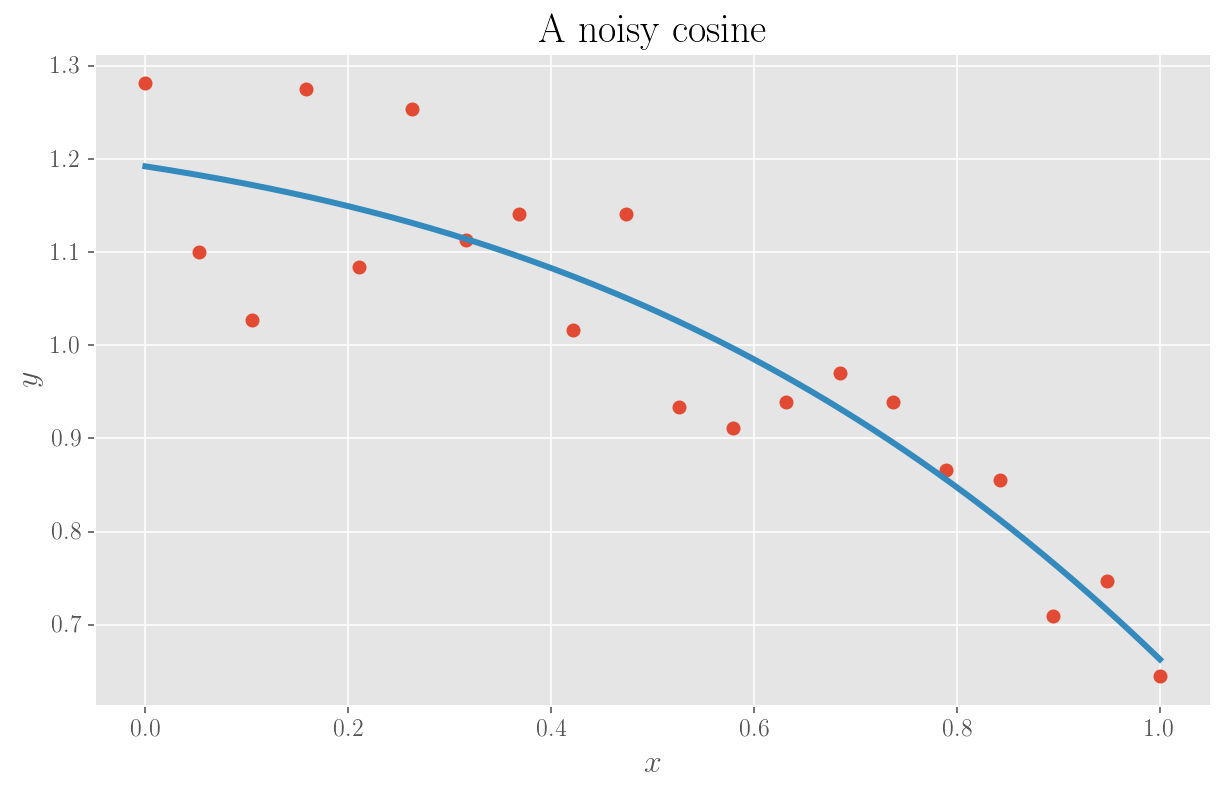

In [21]:
# Setting x's to be 50 linearly spaced points in [0, 1]
x = np.linspace(0, 1, num=20)

# Setting y to be a noised cosine 
y = np.cos(x) + 0.3*np.random.rand(20)

# Fitting points (x, y) to a polynomial of deg 3
fit_coeff = np.polyfit(x, y, 3)

# Build the polynomial with the fitting coefficients
p = np.poly1d(fit_coeff)

# Considering another interval of x's and plotting original points and fitting curve
x2 = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', x2, p(x2), '-') 
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('A noisy cosine')
plt.show();

### Loading datasets from file

In [2]:
# Load data from text file (including csv) into Numpy matrix
data = np.loadtxt(dataset, 
                  delimiter=' ', 
                  skiprows=1,                                                 # skip the first 1 lines (header)
                  usecols=(1,2)                                             # select cols 1 (x) and 2 (y)
                  )

# If there are missing values, run this instead
# data = np.genfromtxt(data_folder + filename, 
#                      delimiter=delimiter, 
#                      skip_header=1,                                       # skip the first 1 lines (header)
#                      usecols=features,                                    # select which features to use
#                      missing='?'                                          # what missing values are mapped to
#                     )

### Playing with NaNs

In [9]:
print(np.log(0), np.log(-1))
print(np.isnan([1.,np.log(-1), 2]))

-inf nan
[False  True False]


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


### IO Numpy data format

In [10]:
data = np.ones((3, 3))

# Saving and loading numpy array
np.save('mat.npy', data)
data_loaded = np.load('mat.npy')

## Scipy

###  Optimize: finding min of function

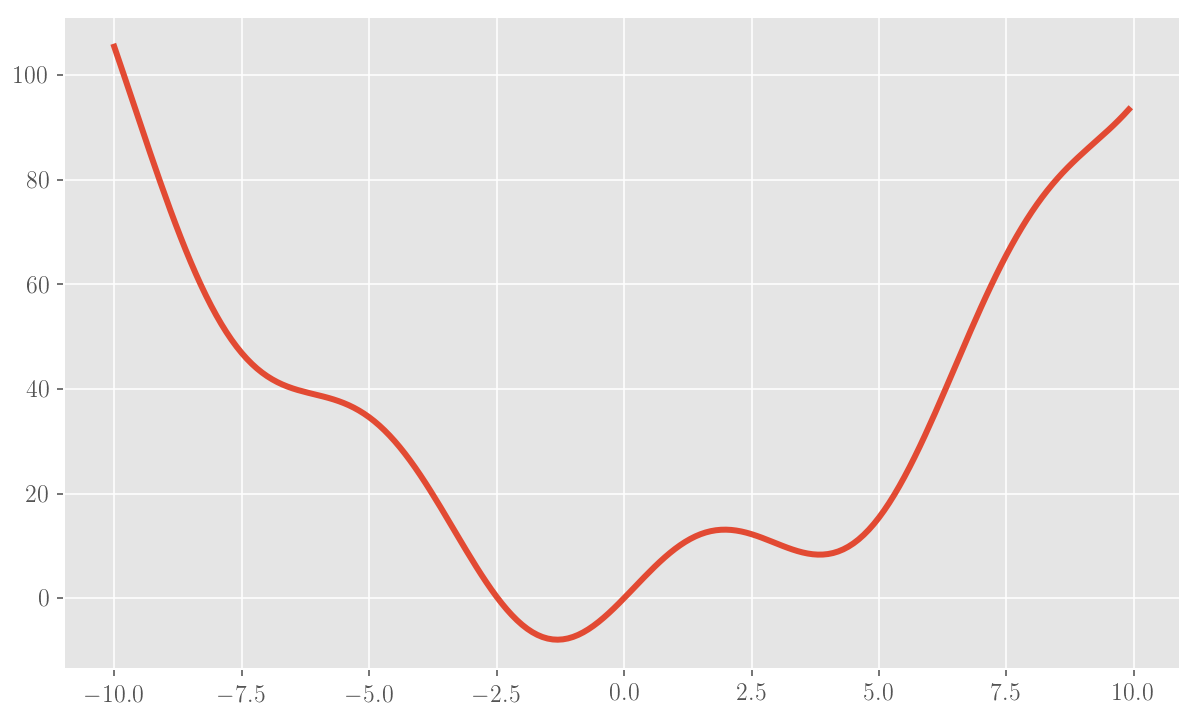

BFGS
Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

BASINHOPPING


                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08581276]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1524
                        nit: 100
                       njev: 508
                          x: array([-1.30644001])

In [23]:
# function definition and plot of it
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show();

# Gradient Descent through BFGS (finds local min)
print('BFGS')
optimize.fmin_bfgs(f, 0)

# Global optimizer though bashinopping (local optimizer + random sampling of starting points)
print('BASINHOPPING')
optimize.basinhopping(f, 0)

# NOTE: there are several other optimizers available

###  Optimize: finding roots of functions

In [24]:
roots = []

#f = x**2 + 10*np.sin(x) is the function defined above
root = optimize.fsolve(f, 1)      # 1 is the initial guess
print(root)
roots.append(root)

# from plot, function has another root, so let us start from -2.5
root = optimize.fsolve(f, -2.5)      # 1 is the initial guess
print(root)
roots.append(root)

[ 0.]
[-2.47948183]


### Optimize: fit curve knowing the functional form, fitting the params

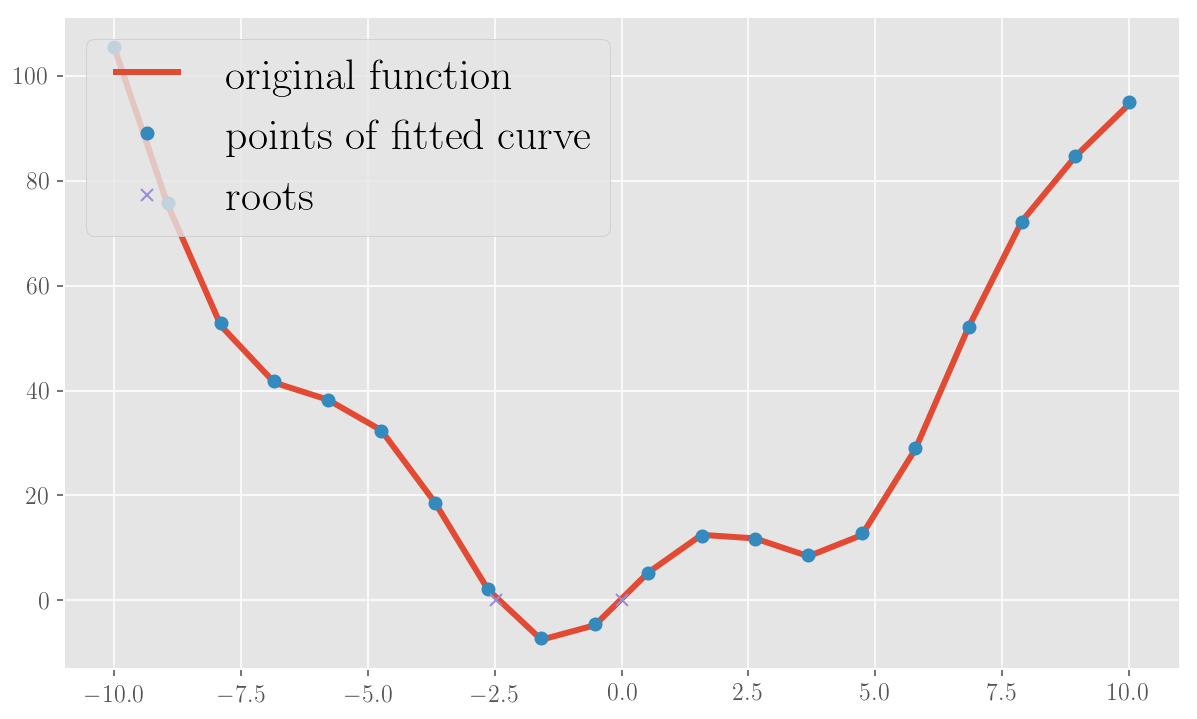

In [28]:
x = np.linspace(-10, 10, num=20)
y = f(x) + np.random.randn(x.size)

def f_to_fit(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f_to_fit, x, y, guess)

# Plotting all stuff together
f_line, = plt.plot(x, f(x), label='original function')
fitted_points, = plt.plot(x, f_to_fit(x, params[0], params[1]), 'o', label='points of fitted curve')
original, = plt.plot(roots, f(np.array(roots)), 'x', label='roots')
legend = plt.legend(handler_map={f_line: HandlerLine2D(numpoints=2)}, loc=2)
plt.show();

### The stats module: histograms and PDFs

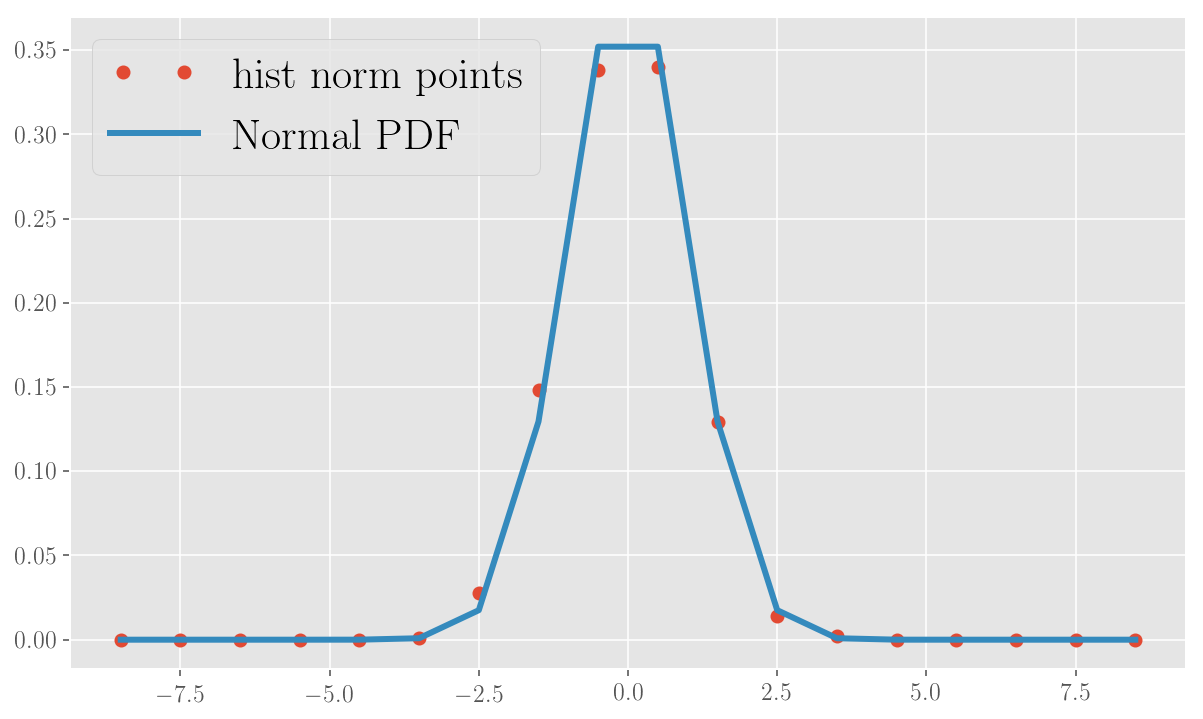

In [29]:
# Build the bins separators, width 1, from -10 to 10
bins_sep = np.arange(-9, 10)

# Extract 1000 normally distributed points
normal_points = np.random.normal(size=1000)

# Histogram the points and compute the normal PDF over bins
histogram = np.histogram(normal_points, bins=bins_sep, normed=True)[0]
bins = 0.5*(bins_sep[1:] + bins_sep[:-1])    # to get the bins centers

# Normal PDF over specified bins
normal_pdf = stats.norm.pdf(bins)

# Plot both things
hist_line, = plt.plot(bins, histogram, 'o', label='hist norm points') 
pdf_line, = plt.plot(bins, normal_pdf, label='Normal PDF')
legend = plt.legend(handler_map={hist_line: HandlerLine2D(numpoints=2)}, loc=2)
plt.show();

### Stats module: quickly compute percentiles

In [30]:
# 50 percentile of previously defined normal points

print(stats.scoreatpercentile(normal_points, 50))

-0.0508135291078


### Interpolate module:  linear and cubic interpolation between points

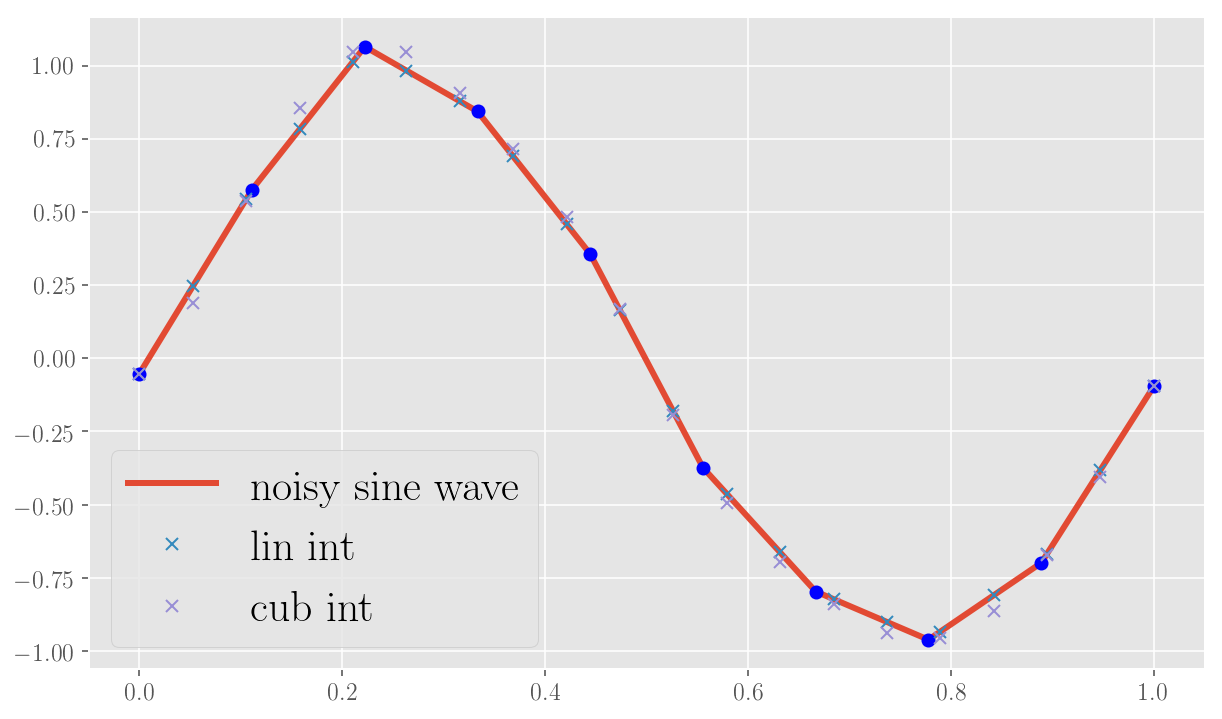

In [35]:
# Defining noisy sine wave
t = np.linspace(0, 1, 10)
middle_t = np.linspace(0, 1, 20)
noise = (np.random.random(10)*2 - 1) * 1e-1
noisy_sin = np.sin(2 * np.pi * t) + noise

# Defining linear interpolation between points
linear_int = interp1d(t, noisy_sin)(middle_t)

# Defining cubic interpolation between points
cubic_int = interp1d(t, noisy_sin, kind='cubic')(middle_t)

# Plot all
noisy_sin_line, = plt.plot(t, noisy_sin, label='noisy sine wave')
noisy_sin_points, = plt.plot(t, noisy_sin, 'o', color='blue')
linear_int_points, = plt.plot(middle_t, linear_int, 'x', label='lin int')
cubic_int_points, = plt.plot(middle_t, cubic_int, 'x', label='cub int')
legend = plt.legend(handler_map={hist_line: HandlerLine2D(numpoints=2)}, loc=3)
plt.show();

### integrate module: compute definite integral of function 

In [38]:
res, err = quad(np.sin, 0, np.pi/2)
print(res, err)

# NOTE: there are other integration methods

0.9999999999999999 1.1102230246251564e-14


### integrate module: solve ODE

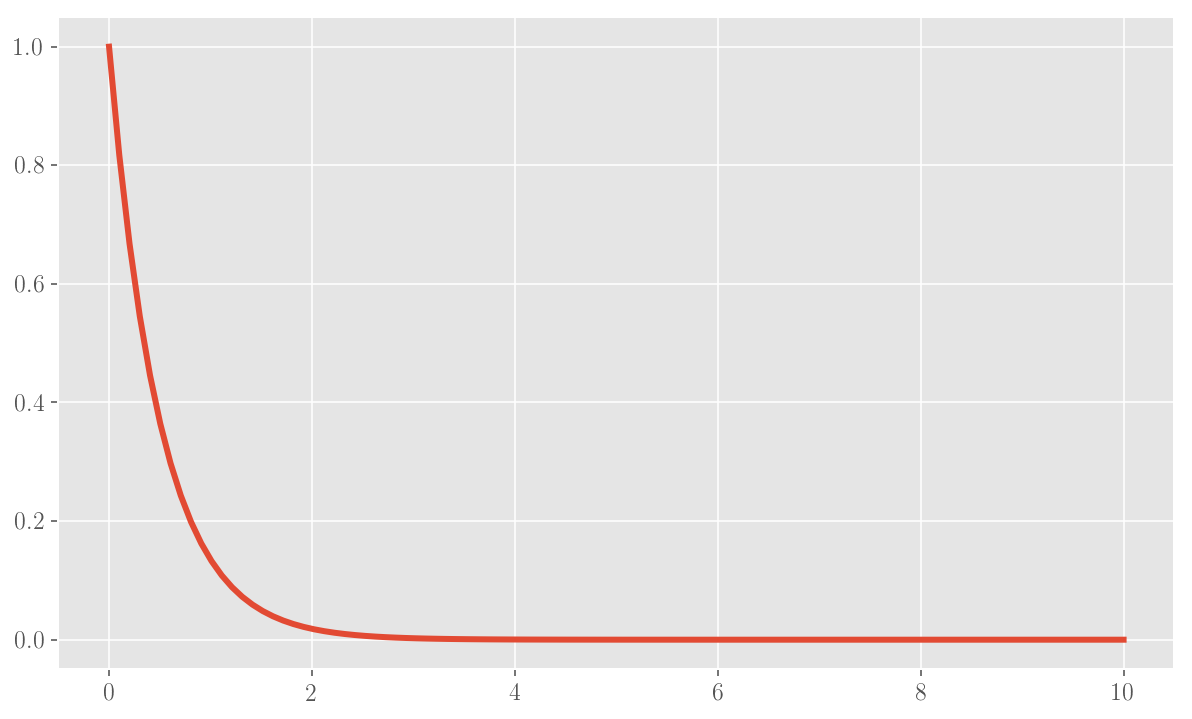

In [41]:
# Defining dy/dt, iteration_count is the counter for the iteration till convergence
def y_dot(y, t, iteration_count):
    iteration_count += 1
    return -2 * y

# Defining t, the vector of iteration count, then solve dy/dt = -2y
t = np.linspace(0, 10, 100)
iteration_count = np.zeros((1,), dtype=np.uint16)
y_sol, infodict = odeint(y_dot, 1, t, args=(iteration_count,), full_output=True)

# Plot solution y(t)
plt.plot(t, y_sol)
plt.plot()
plt.show();

# NOTE: odeint solves a system of ODEs as well
# NOTE: there is no partial diff eq solver in Scipy

### signal module: remove linear trend from noisy signal

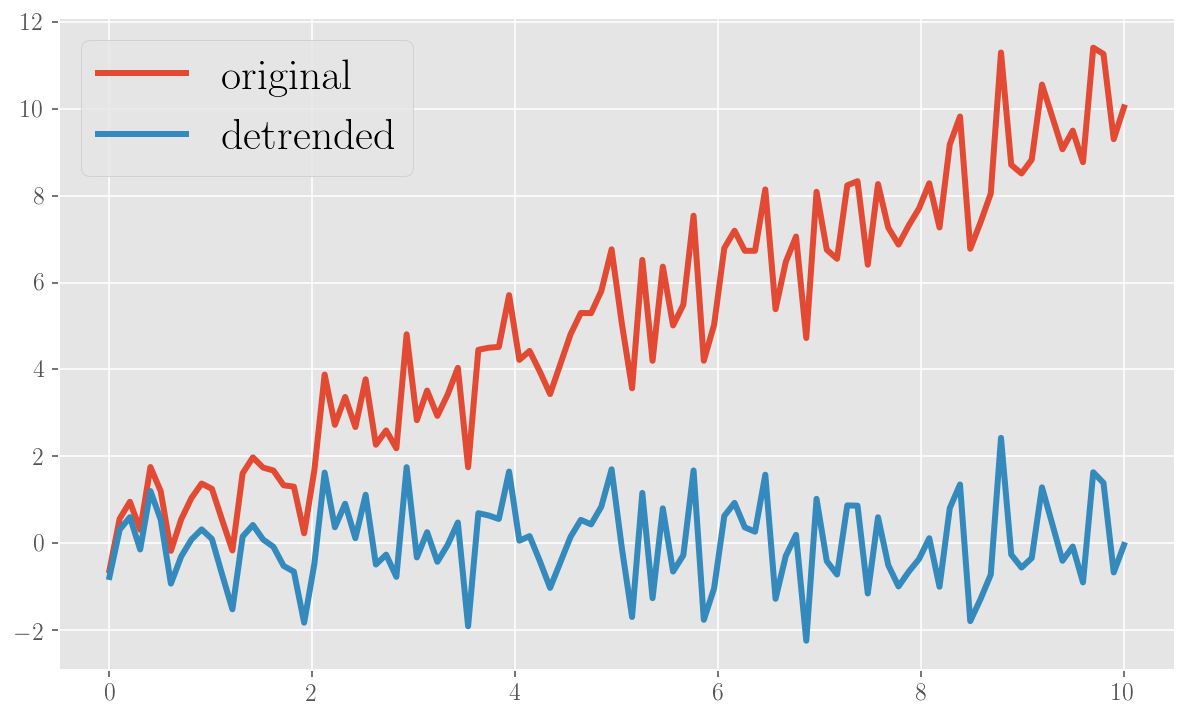

In [45]:
x = t + np.random.normal(size=100)
plt.plot(t, x, label='original')
plt.plot(t, detrend(x), label='detrended')
legend = plt.legend(handler_map={hist_line: HandlerLine2D(numpoints=2)}, loc=2)
plt.show();

### Mathematical distances

In [47]:
# Define two 1D arrays and two matrices

u = np.array([1, 1, 2])
v = np.array([1, 3, 1])
A = np.array([[1, 2, 0], [2,3,4]])
B = np.array([[0, 1, 1], [2, 0, 1]])

In [50]:
print('* Distances between the two vectors')
print('    Euclidean:', distance.euclidean(u, v))
print('    Cosine:', distance.cosine(u, v))
print('    Manhattan:', distance.cityblock(u, v))
print('    Minkowski with p=3:', distance.minkowski(u, v, 3))
print('    Chebyshev:', distance.chebyshev(u, v))
print('    Hamming:', distance.hamming(u, v))

* Distances between the two vectors
    Euclidean: 2.2360679775
    Cosine: 0.261451054124
    Manhattan: 3
    Minkowski with p=3: 2.08008382305
    Chebyshev: 2
    Hamming: 0.666666666667


In [51]:
print('* Distances between each pair of rows in matrices')
print(distance.cdist(A, B, metric='euclidean'))
# cdist is built as (numbers are row indices)
# A0B0 A0B1 A0B2
# A1B0 A1B1 A1B2

* Distances between each pair of rows in matrices
[[ 1.73205081  2.44948974]
 [ 4.12310563  4.24264069]]


In [53]:
print('* Pairwise distances between rows in matrix')
print(distance.pdist(np.array([[0, 0], [1, 1], [1, 2]]), metric='euclidean'))
# pdist is built as (numbers are row indices)
# A0A1 A0A2 A1A2           # len will be N*(N-1) where N is the number of rows

* Pairwise distances between rows in matrix
[ 1.41421356  2.23606798  1.        ]
